In [51]:
# Install the required packages
%pip install pandas numpy

import pandas as pd
import numpy as np
import plotly.graph_objects as go

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


ModuleNotFoundError: No module named 'plotly'

In [ ]:
df = pd.read_csv('data/PremierLeague.csv')
df = df.drop(labels=[
    'Time', 'HomeTeamCorners', 'AwayTeamCorners', 'HalfTimeHomeTeamGoals', 'HalfTimeAwayTeamGoals', 'HalfTimeResult', 'HomeTeamShots', 'AwayTeamShots', 'HomeTeamShotsOnTarget', 'AwayTeamShotsOnTarget', 'B365HomeTeam', 'B365AwayTeam', 'B365Draw', 'B365Over2.5Goals', 'B365Under2.5Goals', 'MarketMaxHomeTeam', 'MarketMaxDraw', 'MarketMaxAwayTeam', 'MarketAvgHomeTeam', 'MarketAvgDraw', 'MarketAvgAwayTeam', 'MarketMaxOver2.5Goals', 'MarketMaxUnder2.5Goals', 'MarketAvgOver2.5Goals', 'MarketAvgUnder2.5Goals', 'HomeTeamPoints', 'AwayTeamPoints'
    ],
    axis = 1,
    )
df = df.dropna()

In [ ]:
top_100_referees = df['Referee'].value_counts().head(30)
print("Top 30 referees based on the number of matches officiated:")
print(top_100_referees)

Top 30 referees based on the number of matches officiated:
Referee
M Dean           529
M Atkinson       460
A Marriner       392
M Oliver         383
A Taylor         380
P Dowd           301
H Webb           297
M Clattenburg    293
L Mason          287
J Moss           274
K Friend         272
C Foy            257
C Pawson         252
M Halsey         228
A Wiley          207
S Bennett        205
S Attwell        205
M Jones          202
P Tierney        183
L Probert        182
R Styles         176
P Walton         169
M Riley          169
C Kavanagh       145
G Poll           139
N Swarbrick      132
D Coote          111
S Hooper         107
G Scott          105
U Rennie         100
Name: count, dtype: int64


Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'

[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


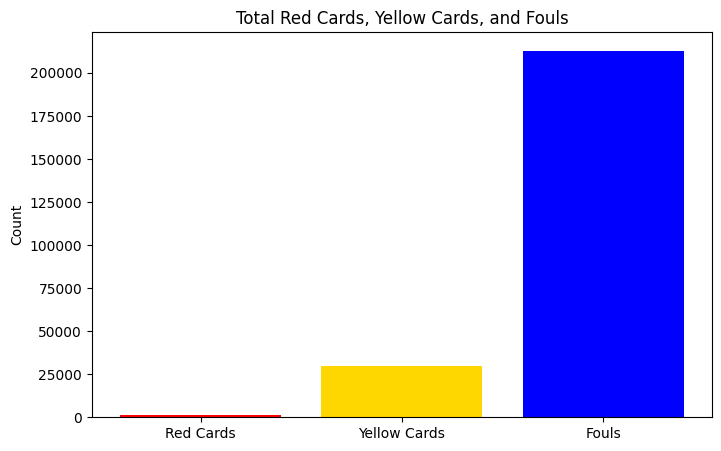

In [52]:
%pip install matplotlib  # Install matplotlib if not already installed
import matplotlib.pyplot as plt  # Import pyplot from matplotlib

def plot_cards_and_fouls():
    # Calculate total red cards from both teams
    total_red = df['HomeTeamRedCards'].sum() + df['AwayTeamRedCards'].sum()
    # Calculate total yellow cards from both teams
    total_yellow = df['HomeTeamYellowCards'].sum() + df['AwayTeamYellowCards'].sum()
    # Calculate total fouls from both teams
    total_fouls = df['HomeTeamFouls'].sum() + df['AwayTeamFouls'].sum()
    
    # Prepare data for plotting
    events = {'Red Cards': total_red, 'Yellow Cards': total_yellow, 'Fouls': total_fouls}
    
    plt.figure(figsize=(8,5))
    plt.bar(events.keys(), events.values(), color=['red', 'gold', 'blue'])
    plt.title("Total Red Cards, Yellow Cards, and Fouls")
    plt.ylabel("Count")
    plt.show()

# Example usage:
plot_cards_and_fouls()

In [ ]:
def get_referee_fouls(referee_name, team_name):
    referee_matches = df[df['Referee'] == referee_name]
    
    home_matches = referee_matches[referee_matches['HomeTeam'] == team_name]
    home_fouls = home_matches['HomeTeamFouls'].sum()

    away_matches = referee_matches[referee_matches['AwayTeam'] == team_name]
    away_fouls = away_matches['AwayTeamFouls'].sum()

    total_matches = len(home_matches) + len(away_matches)
    total_fouls = home_fouls + away_fouls

    return {
        'Total Fouls': total_fouls,
        'Matches Officiated': total_matches,
        'Fouls per Match': total_fouls/total_matches if total_matches > 0 else 0
    }
    
referee = "M Dean"  # Example referee
team = "Arsenal"      # Example team
stats = get_referee_fouls(referee, team)
print(f"Fouls given by {referee} to {team}:")
for key, value in stats.items():
    print(f"{key}: {value:.2f}")

In [ ]:
def get_referee_cards(referee_name, team_name):
    # Get matches where the referee officiated
    referee_matches = df[df['Referee'] == referee_name]
    
    # Get cards when team was home
    home_matches = referee_matches[referee_matches['HomeTeam'] == team_name]
    home_cards = home_matches['HomeTeamYellowCards'].sum() + home_matches['HomeTeamRedCards'].sum()
    
    # Get cards when team was away
    away_matches = referee_matches[referee_matches['AwayTeam'] == team_name]
    away_cards = away_matches['AwayTeamYellowCards'].sum() + away_matches['AwayTeamRedCards'].sum()
    
    total_matches = len(home_matches) + len(away_matches)
    total_cards = home_cards + away_cards
    
    return {
        'Total Cards': total_cards,
        'Matches Officiated': total_matches,
        'Cards per Match': total_cards/total_matches if total_matches > 0 else 0
    }

# Example usage - replace with your desired referee and team
referee = "U Rennie"  # Example referee
team = "Arsenal"      # Example team
stats = get_referee_cards(referee, team)
print(f"Cards given by {referee} to {team}:")
for key, value in stats.items():
    print(f"{key}: {value:.2f}")

Cards given by U Rennie to Arsenal:
Total Cards: 10.00
Matches Officiated: 9.00
Cards per Match: 1.11
